### Ejercicios Cinematica Inversa

##### Librerias

In [2]:
import numpy as np
import sympy as sp
from sympy import init_printing
from sympy import Matrix
from sympy.interactive import printing
printing.init_printing(use_latex=True)
sin=sp.sin
cos=sp.cos
pi=sp.pi

#### Importando funciones internas

In [ ]:
import sys
sys.path.insert(0, 'D:\Files\Sergio\Jupyter Notebook\Libs')
from serialrobot import *
from rot_matrix import *
from tf_matrix import *
from par_or import *
from kinematics import *

##### Funciones

In [2]:
#Funciones de rotación canonicas con valores simbolicos
def srotx(ang):
    Rx=sp.Matrix([[1,0,0],
                  [0,sp.cos(ang),-sp.sin(ang)],
                  [0, sp.sin(ang), sp.cos(ang)]])
    return Rx
def sroty(ang):
    Ry= sp.Matrix([[sp.cos(ang),0,sp.sin(ang)],
                  [0,1,0],
                  [-sp.sin(ang), 0, sp.cos(ang)]])
    return Ry
def srotz(ang):
    Rz= sp.Matrix([[sp.cos(ang),-sp.sin(ang),0],
                  [sp.sin(ang), sp.cos(ang), 0],
                  [0,0,1]])
    return Rz


#T given t,R
def T_tR(t,R):
    T = np.vstack((np.hstack((R,t)),np.array([[0, 0, 0, 1]])))
    return T
def rotdh(d,th,a,alf):
    T=sp.Matrix([[cos(th),-cos(alf)*sin(th),sin(alf)*sin(th),a*cos(th)],
                  [sin(th),cos(alf)*cos(th),-sin(alf)*cos(th),a*sin(th)],
                  [0, sin(alf), cos(alf),d],[0, 0, 0, 1]])
    return T

###### Pregunta 2


In [34]:
#Variables simbolicas
q1,q2,q3,l1,l2,l3 = sp.symbols('q1 q2 q3 l1 l2 l3')
sin=sp.sin
cos=sp.cos
y=l1*sin(q1)+l2*sin(q1+q2)+l3*sin(q1+q2+q3)
x=l1*cos(q1)+l2*cos(q1+q2)+l3*cos(q1+q2+q3)

# a=x**2+y**2
# sp.simplify(a)
# b=x+y
# sp.simplify(b)

#T0_1=Roty(-q1)*Trasx(l1)
#T1_2=Roty(-q2)*Trasx(l2)
#T2_3=Roty(-q3)*Trasx(l3)
#T0_3=

T0_1=sp.Matrix([[cos(-q1), 0, sin(-q1),l1*cos(-q1)],[0, 1, 0, 0],[-sin(-q1),0,cos(-q1),l1*sin(-q1)],[0,0,0,1]])

T1_2=sp.Matrix([[cos(-q2), 0, sin(-q2),l2*cos(-q2)],[0, 1, 0, 0],[-sin(-q2),0,cos(-q2),l2*sin(-q2)],[0,0,0,1]])
T2_3=sp.Matrix([[cos(-q3), 0, sin(-q3),l3*cos(-q3)],[0, 1, 0, 0],[-sin(-q3),0,cos(-q3),l3*sin(-q3)],[0,0,0,1]])
T0_3=T0_1*T1_2*T2_3
sp.simplify(T0_3)



⎡cos(q₁ + q₂ + q₃)  0  -sin(q₁ + q₂ + q₃)  l₁⋅cos(q₁) + l₂⋅cos(q₁ - q₂) + l₃⋅c
⎢                                                                             
⎢        0          1          0                                    0         
⎢                                                                             
⎢sin(q₁ + q₂ + q₃)  0  cos(q₁ + q₂ + q₃)   -l₁⋅sin(q₁) + l₂⋅sin(q₁ - q₂) + l₃⋅
⎢                                                                             
⎣        0          0          0                                    1         

os(q₁ + q₂ - q₃) ⎤
                 ⎥
                 ⎥
                 ⎥
sin(q₁ + q₂ - q₃)⎥
                 ⎥
                 ⎦

In [27]:

y=l1*sin(q1)+l2*sin(q1+q2)+l3*sin(q1+q2+q3)
x=l1*cos(q1)+l2*cos(q1+q2)+l3*cos(q1+q2+q3)

a=x**2+y**2
sp.simplify(a)



##### Pregunta 3

In [34]:
#Variables simbolicas
q1,q2,q3,l1,l2 = sp.symbols('q1 q2 q3 l1 l2')
sin=sp.sin
cos=sp.cos
pi=sp.pi
T0_1=rotdh(0,pi/2+q1,l1,pi/2)
T1_2=rotdh(0,q2,l2,0)
T2_3=rotdh(0,-pi/2+q3,0,pi)
T0_3=sp.simplify(T0_1*T1_2*T2_3)
T0_3

⎡-sin(q₁)⋅sin(q₂ + q₃)  sin(q₁)⋅cos(q₂ + q₃)   -cos(q₁)  -(l₁ + l₂⋅cos(q₂))⋅si
⎢                                                                             
⎢sin(q₂ + q₃)⋅cos(q₁)   -cos(q₁)⋅cos(q₂ + q₃)  -sin(q₁)  (l₁ + l₂⋅cos(q₂))⋅cos
⎢                                                                             
⎢    -cos(q₂ + q₃)          -sin(q₂ + q₃)         0              l₂⋅sin(q₂)   
⎢                                                                             
⎣          0                      0               0                  1        

n(q₁)⎤
     ⎥
(q₁) ⎥
     ⎥
     ⎥
     ⎥
     ⎦

In [35]:
T0_3.subs({q1:0, q2:0, q3:0})

⎡0   0   -1     0   ⎤
⎢                   ⎥
⎢0   -1  0   l₁ + l₂⎥
⎢                   ⎥
⎢-1  0   0      0   ⎥
⎢                   ⎥
⎣0   0   0      1   ⎦

In [37]:
X=sp.Matrix([[cos(q1)*cos(q2+q3),-cos(q1)*sin(q2+q3),sin(q1),(l2*cos(q2)+l1)*cos(q1)],[sin(q1)*cos(q2+q3),-sin(q1)*sin(q2+q3),-cos(q1),(l2*cos(q2)+l1)*sin(q1)],[sin(q2+q3),cos(q2+q3),0,sin(q2)*l2],[0,0,0,1]])

In [38]:
X.subs({q1:0, q2:0, q3:0})

⎡1  0  0   l₁ + l₂⎤
⎢                 ⎥
⎢0  0  -1     0   ⎥
⎢                 ⎥
⎢0  1  0      0   ⎥
⎢                 ⎥
⎣0  0  0      1   ⎦

In [60]:
def newtonrap(J):
    try:
        return np.linalg.inv(J)
    except np.linalg.LinAlgError:
        return np.linalg.pinv(J)


In [84]:
x=np.array([[1,2],[4,2],[3,3]])
a,b,c,d,f,g,e,w = sp.symbols('a b c d f g e w')

A=sp.Matrix([[a,b,e],[c,d,w],[f,g,d]])



In [64]:
def jacobian(T,q):
    x11=sp.diff(T[0,1],q[0],1)
    

In [89]:
#Metodo Gradiente descendiente
import numpy as np
cos=np.cos; sin=np.sin
xd = np.array([1.2, 1.2]) # Desired value in the Cartesian space
q = np.array([0.5, 0.5]) # Initial value in the joint space
epsilon = 1e-3
max_iter = 1000 # Maximum number of iterations
alpha = 0.5
# Iterations: Gradient descent
for i in range(max_iter):
    q1 = q[0]; q2 = q[1];
    J = np.array([[-sin(q1)-sin(q1+q2), -sin(q1+q2)],[ cos(q1)+cos(q1+q2), cos(q1+q2)]])
    f = np.array([cos(q1)+cos(q1+q2), sin(q1)+sin(q1+q2)])
    e = xd-f
    q = q + alpha*np.dot(J.T, e)
# End condition
    if (np.linalg.norm(e) < epsilon):
        break
print(q)


[0.22865855 1.11365928]



#### Pregunta 1 - PC 2016-1

In [28]:
l4,l5,l6,l7,l8,q1,q2,q3,q4,th= sp.symbols('l4 l5 l6 l7 l8 q1 q2 q3 q4 theta')

T01=rotdh(l4,0+q1,0,-pi/2)
T12=rotdh(l5+q2,-pi/2,l6,pi/2)
T23=rotdh(l7+q3,pi/2,0,pi/2)
T34=rotdh(l8,-th+q4,0,0)
T04=sp.simplify(T01*T12*T23*T34)
T04.subs({q1:0, q2:0, q3:0,q4:0})


⎡sin(θ)  -cos(θ)  0      -l₇     ⎤
⎢                                ⎥
⎢cos(θ)  sin(θ)   0       l₅     ⎥
⎢                                ⎥
⎢  0        0     1  l₄ + l₆ + l₈⎥
⎢                                ⎥
⎣  0        0     0       1      ⎦

#### Pregunta 2 - Examen 1 2017-1


In [30]:
j1,j2,j3,j4,j5,j6= sp.symbols('j1 j2 j3 j4 j5 j6')
T01=rotdh(295,pi+j1,0,pi/2)
T12=rotdh(0,-pi/2+j2,-230,0)
T23=rotdh(0,0+j3,-50,pi/2)
T34=rotdh(270,-pi+j4,0,pi/2)
T45=rotdh(0,pi+j5,0,pi/2)
T56=rotdh(70,0+j6,0,0)
T06=sp.simplify(T01*T12*T23*T34*T45*T56)
T06.subs({j1:0, j2:0, j3:0,j4:0,j5:0,j6:0})

⎡0   0  1  340⎤
⎢             ⎥
⎢0   1  0   0 ⎥
⎢             ⎥
⎢-1  0  0  575⎥
⎢             ⎥
⎣0   0  0   1 ⎦

In [31]:
T06


⎡-((sin(j₁)⋅sin(j₄) + sin(j₂ + j₃)⋅cos(j₁)⋅cos(j₄))⋅cos(j₅) + sin(j₅)⋅cos(j₁)⋅
⎢                                                                             
⎢((-sin(j₁)⋅sin(j₂ + j₃)⋅cos(j₄) + sin(j₄)⋅cos(j₁))⋅cos(j₅) - sin(j₁)⋅sin(j₅)⋅
⎢                                                                             
⎢                                (sin(j₅)⋅sin(j₂ + j₃) - cos(j₄)⋅cos(j₅)⋅cos(j
⎢                                                                             
⎣                                                                             

cos(j₂ + j₃))⋅cos(j₆) - (sin(j₁)⋅cos(j₄) - sin(j₄)⋅sin(j₂ + j₃)⋅cos(j₁))⋅sin(j
                                                                              
cos(j₂ + j₃))⋅cos(j₆) + (sin(j₁)⋅sin(j₄)⋅sin(j₂ + j₃) + cos(j₁)⋅cos(j₄))⋅sin(j
                                                                              
₂ + j₃))⋅cos(j₆) + sin(j₄)⋅sin(j₆)⋅cos(j₂ + j₃)                               
                                                   

#### Pregunta 1- PC2 2018-1


In [32]:
th1,th2,th3,th4,th5,l1,l2,l3,l4= sp.symbols('theta1 theta2 theta3 theta4 theta5 l1 l2 l3 l4')

T01=rotdh(l1,pi/2+th1,0,pi/2)
T12=rotdh(0,0+th2,l2,0)
T23=rotdh(0,0+th3,l3,0)
T34=rotdh(0,pi+th4,0,pi/2)
T45=rotdh(-l4,0,0,0)
T05=sp.simplify(T01*T12*T23*T34*T45)
T05

⎡sin(θ₁)⋅cos(θ₂ + θ₃ + θ₄)   cos(θ₁)  sin(θ₁)⋅sin(θ₂ + θ₃ + θ₄)   -(l₂⋅cos(θ₂)
⎢                                                                             
⎢-cos(θ₁)⋅cos(θ₂ + θ₃ + θ₄)  sin(θ₁)  -sin(θ₂ + θ₃ + θ₄)⋅cos(θ₁)  (l₂⋅cos(θ₂) 
⎢                                                                             
⎢    -sin(θ₂ + θ₃ + θ₄)         0         cos(θ₂ + θ₃ + θ₄)          l₁ + l₂⋅s
⎢                                                                             
⎣            0                  0                 0                           

 + l₃⋅cos(θ₂ + θ₃) + l₄⋅sin(θ₂ + θ₃ + θ₄))⋅sin(θ₁)⎤
                                                  ⎥
+ l₃⋅cos(θ₂ + θ₃) + l₄⋅sin(θ₂ + θ₃ + θ₄))⋅cos(θ₁) ⎥
                                                  ⎥
in(θ₂) + l₃⋅sin(θ₂ + θ₃) - l₄⋅cos(θ₂ + θ₃ + θ₄)   ⎥
                                                  ⎥
                  1                               ⎦

In [33]:
T05.subs({th1:0, th2:0, th3:0,th4:0,th5:0})

⎡0   1  0     0   ⎤
⎢                 ⎥
⎢-1  0  0  l₂ + l₃⎥
⎢                 ⎥
⎢0   0  1  l₁ - l₄⎥
⎢                 ⎥
⎣0   0  0     1   ⎦

### Cinematica diferencial


#### Examen 2 - Pregunta 1

In [ ]:
#Parte A

x1,x2,x3,q1,q2,q3,x4,x5,x6,a2,a3= sp.symbols('x1 x2 x3 q1 q2 q3 x4 x5 x6 a2 a3')

T01=rotdh(x1,q1,x4,pi/2)
T12=rotdh(x2,q2,x5,0)
T23=rotdh(x3,q3,x6,0)
T02=sp.simplify(T01*T12)
T03=sp.simplify(T01*T12*T23)

p1=T01[0:3, 3]
z1= T01[0:3, 2]
p2=T02[0:3, 3]
z2=T02[0:3, 2]
p3=T03[0:3, 3]
z3=T03[0:3, 2]

z0 = sp.Matrix([[0],[0],[1]]);
p0 = sp.Matrix([[0],[0],[0]]);
Jv1 = sp.simplify(z0.cross(p3-p0)); Jv2 = sp.simplify(z1.cross(p3-p1)); Jv3=sp.simplify(z2.cross(p3-p2))
Jw1 = z0.subs({x1:0,x2:0,x4:0,x3:0}); Jw2 = z1.subs({x1:0,x2:0,x4:0,x3:0}); Jw3=z2.subs({x1:0,x2:0,x4:0,x3:0})

# print('Jv1:'); display(Jv1.subs({x1:0,x2:0,x4:0,x3:0,x5:a2,x6:a3}))
# print('Jv2:'); display(Jv2.subs({x1:0,x2:0,x4:0,x3:0,x5:a2,x6:a3}))
# print('Jv3:'); display(Jv3.subs({x1:0,x2:0,x4:0,x3:0,x5:a2,x6:a3}))

Jv1=Jv1.subs({x1:0,x2:0,x4:0,x3:0,x5:a2,x6:a3})
Jv2=Jv2.subs({x1:0,x2:0,x4:0,x3:0,x5:a2,x6:a3})
Jv3=Jv3.subs({x1:0,x2:0,x4:0,x3:0,x5:a2,x6:a3})

J1 = sp.Matrix.vstack(Jv1, Jw1.subs({x1:0,x2:0,x4:0,x3:0,x5:a2,x6:a3}))
J2 = sp.Matrix.vstack(Jv2, Jw2.subs({x1:0,x2:0,x4:0,x3:0,x5:a2,x6:a3}))
J3 = sp.Matrix.vstack(Jv3, Jw3.subs({x1:0,x2:0,x4:0,x3:0,x5:a2,x6:a3}))
J = sp.Matrix.hstack(J1, J2, J3)


#Parte C
Jaxy = J[0:3,0:3] #Solo se calculan de la parte de la posicion
det = sp.simplify(Jaxy.det())


# Reeplazando q3=0
Jq3_0 = sp.simplify(Jaxy.subs({q3:0}))
# Reemplazando q3=pi
Jq3_pi = sp.simplify(Jaxy.subs({q3:pi}))
# Rango de las matrices
r0 = Jq3_0.rank()
r1 = Jq3_pi.rank()

# print("El determinante es:"); display(det)
# print("Reemplazando q3=0 el Jacobiano analítico es:"); display(Jq3_0)
# print("y su rango es:", r0)
# print("\nReemplazando q3=pi el Jacobiano analítico es:"); display(Jq3_pi)
# print("y su rango es:", r1)


#Parte D
v_w=sp.Matrix([[1/2],[1/2],[1/2]])
q=sp.Matrix([pi/2,0,-pi/2])
J1=J.subs({q1:q[0],q2:q[1],q3:q[2],a2:1,a3:1})
J2=J1[0:3,0:3]
q_motores=J2.inv()*v_w
# #-0.5,0.5,0
q_motores

#Parte E

fx,fy,fz,mx,my,mz=sp.symbols('fx fy fz mx my mz')
T=sp.Matrix([[mx],[my],[mz]])
F=J1.T.pinv()*T
F


In [ ]:
J

#### Velocidad angular

In [16]:
th, dth= sp.symbols('theta theta')
R=sroty(th)
dth*sp.simplify(sp.diff(R,th)*R.T)



⎡0   0  θ⎤
⎢        ⎥
⎢0   0  0⎥
⎢        ⎥
⎣-θ  0  0⎦

#### Pregunta 3 

In [20]:

#Parte b

q1,q2,q3,d1=sp.symbols('q1 q2 q3 d1')
T01=rotdh(d1,q1,0,0)
T12=rotdh(q2,0,0,-pi/2)
T23=rotdh(q3,0,0,0)

#Matrices de transformacion respecto a 0
T02=sp.simplify(T01*T12)
T03=sp.simplify(T01*T12*T23)

#Obteniendo la columna 3 

p1=T01[0:3, 3]
z1= T01[0:3, 2]
p2=T02[0:3, 3]
z2=T02[0:3, 2]
p3=T03[0:3, 3]
z3=T03[0:3, 2]

z0 = sp.Matrix([[0],[0],[1]]);
p0 = sp.Matrix([[0],[0],[0]]);

Jv1 = sp.simplify(z0.cross(p3-p0)); Jv2 = sp.simplify(z1.cross(p3-p1)); Jv3=sp.simplify(z2.cross(p3-p2))
Jw1 = z0; Jw2 = z1; Jw3=z2

J1 = sp.Matrix.vstack(Jv1, Jw1)
J2 = sp.Matrix.vstack(Jv2, Jw2)
J3 = sp.Matrix.vstack(Jv3, Jw3)
J = sp.Matrix.hstack(J1, J2, J3)
J

⎡-q₃⋅cos(q₁)  -q₃⋅cos(q₁)     0    ⎤
⎢                                  ⎥
⎢-q₃⋅sin(q₁)  -q₃⋅sin(q₁)     0    ⎥
⎢                                  ⎥
⎢     0            0          0    ⎥
⎢                                  ⎥
⎢     0            0       -sin(q₁)⎥
⎢                                  ⎥
⎢     0            0       cos(q₁) ⎥
⎢                                  ⎥
⎣     1            1          0    ⎦

#### Desacoplo cinematico


In [5]:
q1,q2,q3,q4,q5,q6,l1,l2,l3=sp.symbols('q1 q2 q3 q4 q5 q6 l1 l2 l3')
T01=rotdh(0,q1,0,pi/2)
T12=rotdh(0,q2,l1,0)
T23=rotdh(0,q3,0,pi/2)
T34=rotdh(l2,q4,0,-pi/2)
T45=rotdh(0,q5,0,pi/2)
T56=rotdh(l3,q6,0,0)
T06=sp.simplify(T01*T12*T23*T34*T45*T56).subs({q1:0,q2:0,q3:0,q4:0,q5:0,q6:0})
T06


⎡1  0   0      l₁   ⎤
⎢                   ⎥
⎢0  -1  0      0    ⎥
⎢                   ⎥
⎢0  0   -1  -l₂ - l₃⎥
⎢                   ⎥
⎣0  0   0      1    ⎦

#### Pregunta 7

In [61]:
# # q1,q2,a1=sp.symbols('q1 q2 a1')
# # T01=rotdh(0,q1,a1,-pi/2)
# # T12=rotdh(q2,pi,0,pi/2)
# # T02=sp.simplify(T01*T12)
# # T02


# #Calculando el jacobiano

# def Jacobian(v_str, f_list):
#     vars = sp.symbols(v_str)
#     f = sp.sympify(f_list)
#     J = sp.zeros(len(f),len(vars))
#     for i, fi in enumerate(f):
#         for j, s in enumerate(vars):
#             J[i,j] = sp.diff(fi, s)
#     return J

# a1=0.2; 
# q1=-1; q2=2;
# # J=Jacobian('q1 q2','[a1*cos(q1)-q2*sin(q1), a1*sin(q1)+q2*cos(q1)]')
# # J=np.array([[-a1*sin(q1)-q2*cos(q1),-sin(q1)],[a1*cos(q1)-q2*sin(q1),cos(q1)]])
# J=np.array([[-0.9123, 0.8415],[1.7910, 0.5403]])

# xd = np.array([-2, -3]) # Valor deseado en el espacio cartesiano
# qk=np.array([-1, 2])
# qk_1=np.array([-2.7742,-0.6519])


# # f=np.array([a1*cos(q1)-q2*sin(q1), a1*sin(q1)+q2*cos(q1)])
# f=np.array([1.7910,0.9123])
# e=xd-f
# alf=qk_1-qk-e





In [ ]:
#### Pregunta 3
#Parte A
q1,q2,q3,l1,l2,l3=sp.symbols('q1 q2 q3 l1 l2 l3')

x=l1*cos(q1)+l2*cos(q1+q2)+l3*cos(q1+q2+q3)
z=l1*sin(q1)+l2*sin(q1+q2)+l3*sin(q1+q2+q3)
th=q1+q2+q3

#Parte B


def Jacobian(v_str, f_list):
    vars = sp.symbols(v_str)
    f = sp.sympify(f_list)
    J = sp.zeros(len(f),len(vars))
    for i, fi in enumerate(f):
        for j, s in enumerate(vars):
            J[i,j] = sp.diff(fi, s)
    return J


In [75]:
th1,th2,th3,l1,l2=sp.symbols('theta1 theta2 theta3 l1 l2')

T03=sp.Matrix([[cos(th1)*cos(th2+th3), -cos(th1)*sin(th2+th3), sin(th1), (l2*cos(th2)+l1)*cos(th1)],[sin(th1)*cos(th2+th3),-sin(th1)*sin(th2+th3),-cos(th1),(l2*cos(th2)+l1)*sin(th1)],[sin(th2+th3),cos(th2+th3),0,sin(th2)*l2],[0,0,0,1]])
T03.subs({th2:0,th3:0,th1:0}),srotz(th1)

⎛⎡1  0  0   l₁ + l₂⎤                        ⎞
⎜⎢                 ⎥  ⎡cos(θ₁)  -sin(θ₁)  0⎤⎟
⎜⎢0  0  -1     0   ⎥  ⎢                    ⎥⎟
⎜⎢                 ⎥, ⎢sin(θ₁)  cos(θ₁)   0⎥⎟
⎜⎢0  1  0      0   ⎥  ⎢                    ⎥⎟
⎜⎢                 ⎥  ⎣   0        0      1⎦⎟
⎝⎣0  0  0      1   ⎦                        ⎠

In [76]:
import sympy as sp
q1, q2, l1, l2 = sp.symbols("q1 q2 l1 l2")
# Cinemática directa
x = l1*sp.cos(q1) + l2*sp.cos(q1+q2)
y = l1*sp.sin(q1) + l2*sp.sin(q1+q2)
phi = q1 + q2
# Derivadas
dxdq1 = sp.diff(x, q1)
dxdq2 = sp.diff(x, q2)
dydq1 = sp.diff(y, q1)
dydq2 = sp.diff(y, q2)
dphidq1 = sp.diff(phi, q1)
dphidq2 = sp.diff(phi, q2)
# Jacobiano analitico
Ja = sp.Matrix([[ dxdq1, dxdq2],
[ dydq1, dydq2],
[dphidq1, dphidq2]])
display(Ja)

⎡-l₁⋅sin(q₁) - l₂⋅sin(q₁ + q₂)  -l₂⋅sin(q₁ + q₂)⎤
⎢                                               ⎥
⎢l₁⋅cos(q₁) + l₂⋅cos(q₁ + q₂)   l₂⋅cos(q₁ + q₂) ⎥
⎢                                               ⎥
⎣              1                       1        ⎦

In [ ]:
# Slide 42

# variables simbólicas
q1, q2, q3, d1 = sp.symbols("q1 q2 q3 d1")
# Cinemática directa
X = sp.Matrix([[q3*sp.cos(q2)*sp.cos(q1)],
               [q3*sp.cos(q2)*sp.sin(q1)],
               [d1 + q3*sp.sin(q2)]])
# Variables articulares
q = sp.Matrix([q1, q2, q3])
# Jacobiano analítico
Ja2 = X.jacobian(q)

display(Ja2)


In [ ]:
# Slide 47
Jaxy = Ja1[0:2,0:2]
det = sp.simplify(Jaxy.det())

# Reemplazando q2=0 se obtiene:
Jq2_0 = sp.simplify(Jaxy.subs({q2:0}))
# Reemplazando q2=pi se obtiene:
Jq2_1 = sp.simplify(Jaxy.subs({q2:sp.pi}))
# Rango de las matrices
r0 = Jq2_0.rank()
r1 = Jq2_1.rank()

print("El determinante es:"); display(det)
print("Reemplazando q2=0 el Jacobiano analítico es:"); display(Jq2_0)
print("y su rango es:", r0)
print("\nReemplazando q2=pi el Jacobiano analítico es:"); display(Jq2_1)
print("y su rango es:", r1)

In [85]:
#Cinematica diferencial inversa

# variables simbólicas
q1, q2, q3, l1, l2, l3 = sp.symbols("q1 q2 q3 l1 l2 l3")
v_des=sp.Matrix([[0.7],[0],[0]])
#Cinematica directa
X=sp.Matrix([[l1*cos(q1)+l2*cos(q1+q2)+l3*cos(q1+q2+q3)],[l1*sin(q1)+l2*sin(q1+q2)+l3*sin(q1+q2+q3)],[q1+q2+q3]])
# Variables articulares
q = sp.Matrix([q1, q2, q3])
J=X.jacobian(q)
J=J.subs({q1:pi/4,q2:-pi/4, q3:-pi/4,l1:0.5,l2:1,l3:0.5})

#Velocidad articular deseada
q_i=sp.simplify(J.inv()*v_des)
q_i


⎡    0         0.25⋅√2    0.25⋅√2⎤
⎢                                ⎥
⎢0.5⋅√2 + 1  0.25⋅√2 + 1  0.25⋅√2⎥
⎢                                ⎥
⎣    1            1          1   ⎦

#### EJEMPLO CINEMATICA DIFERENCIAL INVERSA
Encontrar las velocidades articulares para que el efector final tenga el siguiente twist (v,w)=(0,0,-L,0,-sqrt(2)/2,0)


In [109]:
# variables simbólicas
L= sp.symbols("L")
sqrt=sp.sqrt
J= sp.Matrix([[0, -sqrt(2),0,-sqrt(2)/2],
              [0,0,-1,0],
              [0,0,0,-sqrt(2)/2],
              [0,0,sqrt(2)/2,0],
              [0,-1,0,-1],
              [1,0,sqrt(2)/2,0]])

t=sp.Matrix([[0],[0],[-L],[0],[-sqrt(2)/2],[0]])

q_i=J.pinv()*t
q_i

⎡     0     ⎤
⎢           ⎥
⎢  -√2⋅L    ⎥
⎢  ──────   ⎥
⎢    2      ⎥
⎢           ⎥
⎢     0     ⎥
⎢           ⎥
⎢3⋅√2⋅L   √2⎥
⎢────── + ──⎥
⎣  4      4 ⎦

In [112]:
#PREGUNTA 3
l1,l2,l3,q1,q2,q3= sp.symbols("l1 l2 l3 q1 q2 q3")
x=l1*cos(q1)+l2*cos(q1+q2)+l3*cos(q1+q2+q3)
y=l1*sin(q1)+l2*sin(q1+q2)+l3*sin(q1+q2+q3)
th=q1+q2+q3
X=sp.Matrix([[y],[x],[th]])
q = sp.Matrix([q1, q2, q3])
J=X.jacobian(q)
J

⎡l₁⋅cos(q₁) + l₂⋅cos(q₁ + q₂) + l₃⋅cos(q₁ + q₂ + q₃)   l₂⋅cos(q₁ + q₂) + l₃⋅co
⎢                                                                             
⎢-l₁⋅sin(q₁) - l₂⋅sin(q₁ + q₂) - l₃⋅sin(q₁ + q₂ + q₃)  -l₂⋅sin(q₁ + q₂) - l₃⋅s
⎢                                                                             
⎣                         1                                               1   

s(q₁ + q₂ + q₃)   l₃⋅cos(q₁ + q₂ + q₃) ⎤
                                       ⎥
in(q₁ + q₂ + q₃)  -l₃⋅sin(q₁ + q₂ + q₃)⎥
                                       ⎥
                            1          ⎦

In [120]:
#PREGUNTA 4
l1,l2,q1,q2,fx,fy,fz,ux,uy,uz,wz= sp.symbols("l1 l2 q1 q2 fx fy fz ux uy uz wz")
x=l1*cos(q1)+l2*cos(q1+q2)
y=l1*sin(q1)+l2*sin(q1+q2)
q=sp.Matrix([q1, q2])
X=sp.Matrix([[x],[y],[0],[0],[0],[wz]])
J=X.jacobian(q)
F=sp.Matrix([[fx],[fy],[fz],[ux],[uy],[uz]])
t=J.T*F
t

⎡fx⋅(-l₁⋅sin(q₁) - l₂⋅sin(q₁ + q₂)) + fy⋅(l₁⋅cos(q₁) + l₂⋅cos(q₁ + q₂))⎤
⎢                                                                      ⎥
⎣               -fx⋅l₂⋅sin(q₁ + q₂) + fy⋅l₂⋅cos(q₁ + q₂)               ⎦

In [7]:
#Pregunta 1 pc3
q1,q2,q3,l1,l2,l3=sp.symbols('q1 q2 q3 l1 l2 l3')
T01=rotdh(0,q1,l1,0)
T12=rotdh(0,q2,-l2,pi/2)
T23=rotdh(l3,q3,0,0)
T02=T01*T12
T03=T01*T12*T23

#Obteniendo la columna 3 

p1=T01[0:3, 3]
z1= T01[0:3, 2]
p2=T02[0:3, 3]
z2=T02[0:3, 2]
p3=T03[0:3, 3]
z3=T03[0:3, 2]

z0 = sp.Matrix([[0],[0],[1]]);
p0 = sp.Matrix([[0],[0],[0]]);

Jv1 = sp.simplify(z0.cross(p3-p0)); Jv2 = sp.simplify(z1.cross(p3-p1)); Jv3=sp.simplify(z2.cross(p3-p2))
Jw1 = z0; Jw2 = z1; Jw3=z2

J1 = sp.Matrix.vstack(Jv1, Jw1)
J2 = sp.Matrix.vstack(Jv2, Jw2)
J3 = sp.Matrix.vstack(Jv3, Jw3)
J = sp.Matrix.hstack(J1, J2, J3)
Jf=J.subs({l1:1,l2:1,l3:1,q1:0,q2:pi,q3:pi})

v_w=sp.Matrix([[0],[0],[0],[0],[0],[1]])

q_deseado=Jf.pinv()*v_w

⎡-1/2⎤
⎢    ⎥
⎢ 1  ⎥
⎢    ⎥
⎣ 0  ⎦

In [3]:
def rotdh(d,th,a,alf):
    T=sp.Matrix([[cos(th),-cos(alf)*sin(th),sin(alf)*sin(th),a*cos(th)],
                  [sin(th),cos(alf)*cos(th),-sin(alf)*cos(th),a*sin(th)],
                  [0, sin(alf), cos(alf),d],[0, 0, 0, 1]])
    return T

In [6]:
#Pregunta 1
j1,j2,j3,j4,j5,j6=sp.symbols('j1 j2 j3 j4 j5 j6')
T01=rotdh(0,pi/2+j1,0,pi/2)
T12=rotdh(0,-pi/2+j2,0,pi/2)
T23=rotdh(-19.05,0+j3,350,0)
T34=rotdh(0,pi+j4,-340,0)
T45=rotdh(0,0+j5,0,pi/2)
T56=rotdh(0,-pi/2+j6 ,0,-pi/2)

T06=sp.simplify(T01*T12*T23*T34*T45*T56)
T06.subs({j1:0,j2:0,j3:0,j4:0,j5:0,j6:0})

⎡0  -1  0    0   ⎤
⎢                ⎥
⎢1  0   0  19.05 ⎥
⎢                ⎥
⎢0  0   1  -690.0⎥
⎢                ⎥
⎣0  0   0    1   ⎦

In [50]:
#Pregunta 2
q1,q2,q3,l2=sp.symbols('q1 q2 q3 l2')
T01=rotdh(0,q1,0,0)
T12=rotdh(q2,-pi/2,0,-pi/2)
T23=rotdh(0,q3,l2,-pi/2)

#Matrices de transformacion respecto a 0
T02=sp.simplify(T01*T12)
T03=sp.simplify(T01*T12*T23)

#Obteniendo la columna 3 

p1=T01[0:3, 3]
z1= T01[0:3, 2]
p2=T02[0:3, 3]
z2=T02[0:3, 2]
p3=T03[0:3, 3]
z3=T03[0:3, 2]

z0 = sp.Matrix([[0],[0],[1]]);
p0 = sp.Matrix([[0],[0],[0]]);

Jv1 = sp.simplify(z0.cross(p3-p0)); Jv2 = sp.simplify(z1.cross(p3-p1)); Jv3=sp.simplify(z2.cross(p3-p2))
Jw1 = z0; Jw2 = z1; Jw3=z2

J1 = sp.Matrix.vstack(Jv1, Jw1)
J2 = sp.Matrix.vstack(Jv2, Jw2)
J3 = sp.Matrix.vstack(Jv3, Jw3)
J = sp.Matrix.hstack(J1, J2, J3)
J
#Parte A
q=sp.Matrix([pi/4, 0.5,pi])
l2r=0.6
Jr=J.subs({q1:q[0],q2:q[1],q3:q[2],l2:l2r})
q_i=sp.Matrix([[0.4],[0.1],[0.4]])
v_w=Jr*q_i
 #v_w=Matrix([[-0.15*sqrt(2)], [-0.15*sqrt(2)], [0.240000000000000], [0.2*sqrt(2)], [0.2*sqrt(2)], [0.500000000000000]])
print('a) El twist es: '); display(v_w)
#Parte b

Jxy =sp.Matrix([[l2*cos(q1)*cos(q3), l2*cos(q1)*cos(q3), -l2*sin(q1)*sin(q3)],[l2*sin(q1)*cos(q3), l2*sin(q1)*cos(q3), l2*sin(q3)*cos(q1)],[0, 0, -l2*cos(q3)]])
Jxy
det = sp.simplify(Jxy.det())
print("b) El determinante es:"); display(det) #el det es= 0
#Por lo que no exiten singularidades

#Parte c

F=sp.Matrix([[0.5],[0.5],[0.5],[0],[0],[0]])
t=Jr.T*F
print('c) Los torques serian:'); display(t)
#t=[-0.3*sqrt(2),-0.3*sqrt(2),0.3] 


a) El twist es: 


⎡-0.15⋅√2⎤
⎢        ⎥
⎢-0.15⋅√2⎥
⎢        ⎥
⎢  0.24  ⎥
⎢        ⎥
⎢ 0.2⋅√2 ⎥
⎢        ⎥
⎢ 0.2⋅√2 ⎥
⎢        ⎥
⎣  0.5   ⎦

b) El determinante es:


c) Los torques serian:


⎡-0.3⋅√2⎤
⎢       ⎥
⎢-0.3⋅√2⎥
⎢       ⎥
⎣  0.3  ⎦

El angulo q1 obtenido es:


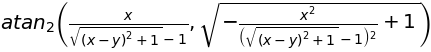

El angulo q2 obtenido es:


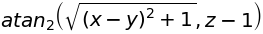

In [74]:
#Pregunta 3
a1,a2,q1,q2,d, x, y, z=sp.symbols('a1 a2 q1 q2 d x y z')
X=sp.Matrix([[a2*sin(q1)*sin(q2)-d*sin(q1)],[d*cos(q1)-a2*cos(q1)*sin(q2)],[a1+a2*cos(q2)]])

#Parte A

a1=1
a2=1
d=1
#(x-y)**2=(a2*sin(q1)*sin(q2)-d*sin(q1)-(d*cos(q1)-a2*cos(q1)*sin(q2)))**2
s2=sp.sqrt((d**2+(x-y)**2)/a2**2)
c2=(z-a1)/a2

q2=sp.atan2(s2,c2)

#Calculamos q1
s1=x/(a2*s2-d)
c1=sp.sqrt(1-s1**2)
q1=sp.atan2(s1,c1)
print('El angulo q1 obtenido es:'); display(q1)
print('El angulo q2 obtenido es:'); display(q2)
#Parte B: No es posible controlar los 3 valores de posicion ya que el jacobiano de
#la cinematica directa de este robot es d rango 2, por lo cual solo podriamos controlar
#un maximo de 2 grados de libertad del robot

XR=X.subs({a1:1,a2:1,d:1})
q=sp.Matrix([q1,q2,q3])
J=X.jacobian(q)
#J.rank()=2